In [10]:
#########LOAD DATA


import numpy as np
import librosa
import librosa.display


pathAudio = "di/"
files = librosa.util.find_files(pathAudio, ext=['wav']) 
files = np.asarray(files)

print(files.shape)

X = []
fs8k = 8000
for file in files:
  x,fs = librosa.load(file, sr=8000 ,mono = True) 

  #X.append(librosa.amplitude_to_db(np.abs(np.fft.fft(x,8000))))
  X.append(librosa.yin(x,fmin=librosa.note_to_hz('C2'),fmax=librosa.note_to_hz('C7')))
  
  #f0, voiced_flag, voiced_probs = librosa.pyin(x,fmin=librosa.note_to_hz('C2'),fmax=librosa.note_to_hz('C7'))
  #times = librosa.times_like(f0)
  #D = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
  #fig, ax = plt.subplots()
  #img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
  #ax.set(title='pYIN fundamental frequency estimation')
  #fig.colorbar(img, ax=ax, format="%+2.f dB")
  #ax.plot(f0, label='f0', color='cyan', linewidth=3)
  #ax.legend(loc='upper right')

X = np.array(X)

print("The shape of X is")
print(X.shape)




(138,)
The shape of X is
(138, 94)


In [13]:
#########STANDARIZATION

import os

mu = np.mean(X, axis=0)
print(mu.shape)
std = np.max(X, axis=0)
print(std.shape)
Xmus = (X-mu)/std
print(Xmus)


(94,)
(94,)
[[ 3.02828963e-01 -2.50569234e-02 -2.46909822e-02 ...  1.92764167e-01
   2.02191931e-01  1.25095439e-01]
 [ 1.30048826e-01 -9.05018467e-05  1.35250226e-04 ...  2.17778208e-01
   2.27050729e-01  1.49744274e-01]
 [-1.72671303e-01  2.96553740e-01  2.96655223e-01 ... -1.39703419e-01
  -1.30154074e-01 -2.07690709e-01]
 ...
 [-5.57243994e-02 -2.83681354e-01 -2.83519684e-01 ... -6.71438498e-02
  -5.75596040e-02 -1.35058463e-01]
 [-4.80541176e-02 -2.74697924e-01 -2.74480709e-01 ... -5.78181729e-02
  -4.81620122e-02 -1.25733095e-01]
 [-1.68330585e-01 -2.64563888e-01 -2.64569605e-01 ... -4.77402885e-02
  -3.81951540e-02 -1.15745183e-01]]


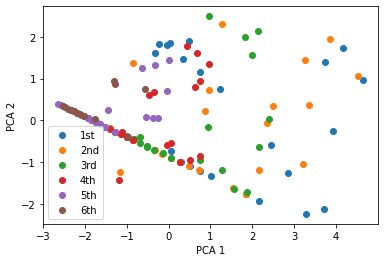

In [14]:
############PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=6)

X_PCA = pca.fit_transform(Xmus)


plt.scatter(X_PCA[:24, 0],X_PCA[:24, 1], label='1st')
plt.scatter(X_PCA[25:49, 0],X_PCA[25:49, 1], label='2nd')
plt.scatter(X_PCA[50:73, 0],X_PCA[50:73, 1], label='3rd')
plt.scatter(X_PCA[74:99, 0],X_PCA[74:99, 1], label='4th')
plt.scatter(X_PCA[100:124, 0],X_PCA[100:124, 1], label='5th')
plt.scatter(X_PCA[125:138, 0],X_PCA[125:138,1], label='6th')

plt.legend()

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()
